<a href="https://colab.research.google.com/github/SJhawar1010/Deep-Learning/blob/main/2348554_DL_Lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install -q kaggle

In [10]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"satyamjhawar","key":"c36e7ad31fc8e0b6a1f56a821e4bb5e2"}'}

In [20]:
! mkdir ~/.kaggle1

In [21]:
! cp kaggle.json ~/.kaggle1/

In [22]:
! chmod 600 ~/.kaggle1/kaggle.json

In [23]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [00:32<00:00, 72.9MB/s]
100% 2.29G/2.29G [00:32<00:00, 74.7MB/s]


In [24]:
!unzip /content/chest-xray-pneumonia.zip

Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating:

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.applications import ResNet50
from sklearn.metrics import classification_report, confusion_matrix

In [26]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

In [27]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [28]:
training_set = train_datagen.flow_from_directory('/content/chest_xray/train',
                                                 target_size=(64, 64),
                                                 batch_size=32,
                                                 class_mode='binary')

validation_set = test_datagen.flow_from_directory('/content/chest_xray/val',
                                                  target_size=(64, 64),
                                                  batch_size=32,
                                                  class_mode='binary')

test_set = test_datagen.flow_from_directory('/content/chest_xray/test',
                                            target_size=(64, 64),
                                            batch_size=32,
                                            class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [29]:
custom_cnn = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [30]:
custom_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [31]:
resnet = Sequential()
resnet.add(ResNet50(include_top=False, pooling='avg', weights='imagenet'))
resnet.add(Dense(1, activation='sigmoid'))
resnet.layers[0].trainable = False

94765736/94765736 [==============================] - 1s 0us/step


In [32]:
resnet.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [33]:
custom_cnn_history = custom_cnn.fit(training_set, validation_data=validation_set, epochs=10)

Epoch 1/10
163/163 [==============================] - 127s 761ms/step - loss: 0.3425 - accuracy: 0.8687 - val_loss: 6.1298 - val_accuracy: 0.5000
Epoch 2/10
163/163 [==============================] - 89s 542ms/step - loss: 0.2175 - accuracy: 0.9130 - val_loss: 9.3043 - val_accuracy: 0.5000
Epoch 3/10
163/163 [==============================] - 87s 534ms/step - loss: 0.2422 - accuracy: 0.9089 - val_loss: 2.1010 - val_accuracy: 0.5000
Epoch 4/10
163/163 [==============================] - 86s 524ms/step - loss: 0.1998 - accuracy: 0.9225 - val_loss: 1.2691 - val_accuracy: 0.5625
Epoch 5/10
163/163 [==============================] - 91s 560ms/step - loss: 0.1831 - accuracy: 0.9329 - val_loss: 1.8905 - val_accuracy: 0.5625
Epoch 6/10
163/163 [==============================] - 86s 528ms/step - loss: 0.1802 - accuracy: 0.9317 - val_loss: 0.7402 - val_accuracy: 0.5625
Epoch 7/10
163/163 [==============================] - 87s 530ms/step - loss: 0.1583 - accuracy: 0.9381 - val_loss: 0.7067 - val_a

In [34]:
resnet_history = resnet.fit(training_set, validation_data=validation_set, epochs=10)

Epoch 1/10
163/163 [==============================] - 117s 693ms/step - loss: 0.5333 - accuracy: 0.7431 - val_loss: 0.7100 - val_accuracy: 0.5000
Epoch 2/10
163/163 [==============================] - 111s 677ms/step - loss: 0.4800 - accuracy: 0.7542 - val_loss: 0.6834 - val_accuracy: 0.5625
Epoch 3/10
163/163 [==============================] - 112s 686ms/step - loss: 0.4441 - accuracy: 0.7776 - val_loss: 0.6106 - val_accuracy: 0.6250
Epoch 4/10
163/163 [==============================] - 111s 677ms/step - loss: 0.4184 - accuracy: 0.8069 - val_loss: 0.6344 - val_accuracy: 0.6250
Epoch 5/10
163/163 [==============================] - 113s 694ms/step - loss: 0.4032 - accuracy: 0.8073 - val_loss: 0.6110 - val_accuracy: 0.6250
Epoch 6/10
163/163 [==============================] - 110s 674ms/step - loss: 0.3945 - accuracy: 0.8156 - val_loss: 0.5735 - val_accuracy: 0.6250
Epoch 7/10
163/163 [==============================] - 111s 677ms/step - loss: 0.3790 - accuracy: 0.8301 - val_loss: 0.5404 -

In [35]:
custom_cnn_eval = custom_cnn.evaluate(test_set)
print("Custom CNN Evaluation:", custom_cnn_eval)

20/20 [==============================] - 8s 370ms/step - loss: 3.4240 - accuracy: 0.6250
Custom CNN Evaluation: [3.4239513874053955, 0.625]


In [36]:
resnet_eval = resnet.evaluate(test_set)
print("ResNet Evaluation:", resnet_eval)

20/20 [==============================] - 12s 596ms/step - loss: 0.3871 - accuracy: 0.8301
ResNet Evaluation: [0.3870585858821869, 0.8301281929016113]


In [37]:
custom_cnn_predictions = custom_cnn.predict(test_set)
resnet_predictions = resnet.predict(test_set)

20/20 [==============================] - 13s 595ms/step


In [38]:
custom_cnn_pred_labels = np.where(custom_cnn_predictions > 0.5, 1, 0)
resnet_pred_labels = np.where(resnet_predictions > 0.5, 1, 0)

In [39]:
print("Custom CNN Classification Report:")
print(classification_report(test_set.classes, custom_cnn_pred_labels))

Custom CNN Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       234
           1       0.62      1.00      0.77       390

    accuracy                           0.62       624
   macro avg       0.31      0.50      0.38       624
weighted avg       0.39      0.62      0.48       624



In [40]:
print("ResNet Classification Report:")
print(classification_report(test_set.classes, resnet_pred_labels))

ResNet Classification Report:
              precision    recall  f1-score   support

           0       0.37      0.26      0.31       234
           1       0.62      0.73      0.67       390

    accuracy                           0.56       624
   macro avg       0.50      0.50      0.49       624
weighted avg       0.53      0.56      0.54       624



In [41]:
custom_cnn_cm = confusion_matrix(test_set.classes, custom_cnn_pred_labels)
resnet_cm = confusion_matrix(test_set.classes, resnet_pred_labels)

([<matplotlib.axis.YTick at 0x7a8ba89a2ef0>,
 [Text(0, 0, 'Normal'), Text(0, 1, 'Pneumonia')])

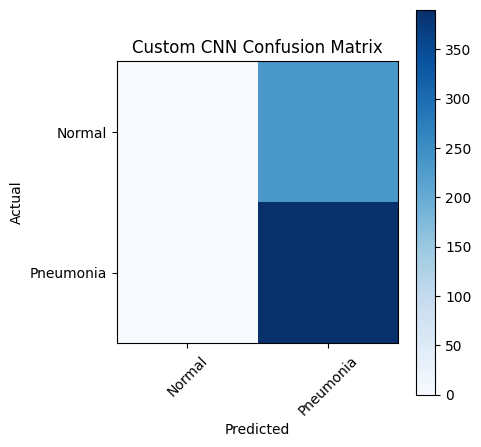

In [42]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.title('Custom CNN Confusion Matrix')
plt.imshow(custom_cnn_cm, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0,1], ['Normal', 'Pneumonia'], rotation=45)
plt.yticks([0,1], ['Normal', 'Pneumonia'])

([<matplotlib.axis.YTick at 0x7a8ba8970fa0>,
 [Text(0, 0, 'Normal'), Text(0, 1, 'Pneumonia')])

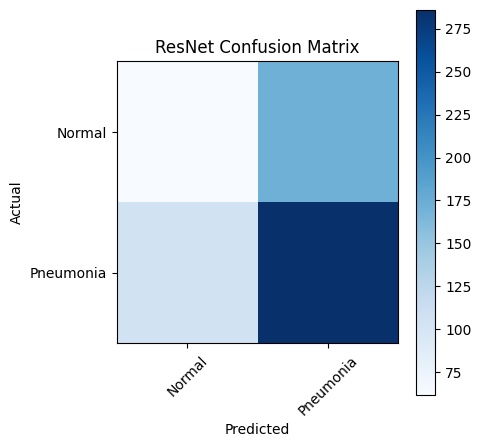

In [44]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 2)
plt.title('ResNet Confusion Matrix')
plt.imshow(resnet_cm, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0,1], ['Normal', 'Pneumonia'], rotation=45)
plt.yticks([0,1], ['Normal', 'Pneumonia'])